<a href="https://colab.research.google.com/github/liz-lewis-manchester/CNM_2025_group_09/blob/Test-1.3v2/coursework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computing & Numerical Methods Coursework Group 9
By: Ching Yau Chan, Hassan Alhamdani, Jiongjie Chen, Lucas So and Oyinmiebi Youdeowei

# Test 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation


def concentration_over_time(end_time,time_interval,length,length_interval,speed,concentration_at_x0_past,decay_constant,random_perturbation):

 distance = np.array([]) #Creates an empty array to hold 'distance' values
 for i in range(int(length / length_interval+1)): #This calculates how many steps in distance that can fit within the interval and loops that many times
  distance = np.append(distance , length_interval * i ) #Adds the calculated values for distance step into the 'distance' array

 initial_conditions = np.zeros(int(length / length_interval+1)) #Creates an empty array the size of number of steps in distance
 initial_conditions[0] = concentration_at_x0_past #Sets the first value in the 'initial_conditions' array to inputted initial pollution level

 #fig creates a blank picture frame which draws on the co-ordinate system 'ax' so colab doesn't get confused which graph to output
 fig, ax = plt.subplots()

 num_frames = (int(end_time / time_interval)+1)

 # Make a copy of initial_conditions that will be updated at each time step
 current_initial_conditions = initial_conditions.copy()

 # Initialize a list to store all concentration profiles for animation
 all_concentrations = [initial_conditions.copy()]

 #This calculates and loops by the number of steps in time
 for k in range(1,num_frames):
  concentration_present = np.zeros(int(length / length_interval+1))
  # Apply exponential decay to the boundary concentration at x=0
  concentration_present[0] = concentration_at_x0_past * np.exp(-decay_constant * k * time_interval)

  random_variable = np.random.random((int(length / length_interval+1)))
  random_speed = (1 - random_perturbation/100 + random_perturbation/50 * random_variable) * speed

  #Random speed affects A and B values
  A_value = 1/time_interval + random_speed / length_interval
  B_value = random_speed / length_interval

  #Calculating the concentration for the current time step
  for i in range(1,int(length / length_interval)+1):
    concentration_present[i]=(current_initial_conditions[i] / time_interval + B_value[i]*concentration_present[i-1]) / A_value[i]

  current_initial_conditions = concentration_present.copy()
  # Store the current concentration profile
  all_concentrations.append(concentration_present.copy())



 # Set some attributes of the animation object
 plt.rcParams["animation.html"] = "jshtml"
 plt.rcParams['figure.dpi'] = 150
 plt.ioff()  # interactive off

 # setting function for plotting
 def animate(f):
    ax.cla()  # Clearing prevoius plot

    # Retrieve the correct concentration profile for the current frame
    concentration = all_concentrations[f]

    # Draw the plot on ax
    ax.plot(distance, concentration)

    # Set axis limits and labels on ax
    ax.set_xlim(0, length)
    ax.set_ylim(0, concentration_at_x0_past * 1.1)
    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Concentration (μg/m³)")
    ax.set_title(f"Concentration at Time = {f * time_interval:.1f} s")
    ax.grid(True)
    plt.close()

 # Create the animation
 anim = matplotlib.animation.FuncAnimation(fig, animate, frames=num_frames)
 return anim



How long should the model last for, in seconds  300
The time interval, in seconds   10
Length of model, in metres   20
The length interval, in metres   0.2
Speed of river flow, in m/s   0.1
initial_concentration_at_x0, in μg/m^3   250


In [ ]:
#These are the inputs that act as parameters that allow the user to specify model domain, resolution, and boundary conditions at the edge of the domain
end_time = float(input("How long should the model last for, in seconds  "))
time_interval = float(input("The time interval, in seconds   "))
length = float(input("Length of model, in metres   "))
length_interval = float(input("The length interval, in metres   "))
speed = float(input("Speed of river flow, in m/s   "))
concentration_at_x0_past = float(input("initial_concentration_at_x0, in μg/m^3   "))
# Input for decay constant has been added
decay_constant = 0
random_perturbation = 0

anim = concentration_over_time(end_time,time_interval,length,length_interval,speed,concentration_at_x0_past,decay_constant,random_perturbation)
anim

# Test 1.3

How long should the model last for, in seconds  300
The time interval, in seconds   10
Length of model, in metres   20
The length interval, in metres   0.2
Speed of river flow, in m/s   0.1
initial_concentration_at_x0, in μg/m^3   250


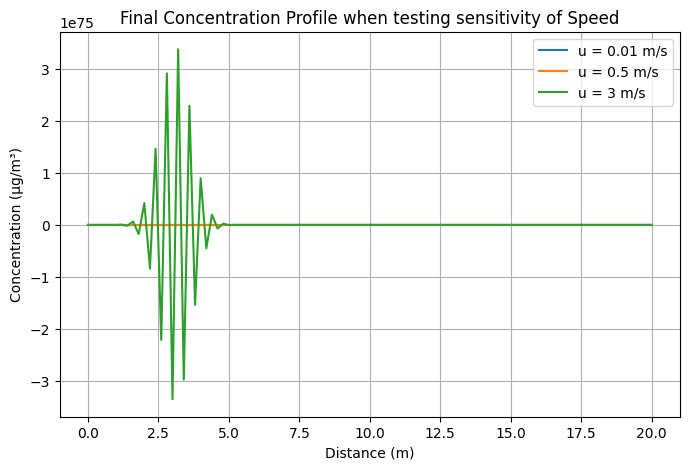

In [ ]:
#Initial conditions of the model
end_time = float(input("How long should the model last for, in seconds  "))
time_interval = float(input("The time interval, in seconds   "))
length = float(input("Length of model, in metres   "))
length_interval = float(input("The length interval, in metres   "))
speed = float(input("Speed of river flow, in m/s   "))
concentration_at_x0_past = float(input("initial_concentration_at_x0, in μg/m^3   "))

decay_constant=0
random_perturbation+0
#Input three speed values to test this parameters sensitivity
speeds_to_test = [0.01, 0.5, 3] #All in m/s

# Spatial grid
x = np.arange(0, length + length_interval, length_interval)
time_steps = int(end_time / time_interval)

# Arrays to store results for plots
results = {}

for speed in speeds_to_test:
    # Initial concentration profile
    concentration = np.zeros(len(x))
    concentration[0] = concentration_at_x0_past

    # Time stepping
    for _ in range(time_steps):
        new_concentration = concentration.copy()

        for i in range(1, len(x)):
            new_concentration[i] = concentration[i] - speed * time_interval / length_interval * (
                concentration[i] - concentration[i - 1])
        concentration = new_concentration

    results[speed] = concentration

# Plot results
plt.figure(figsize=(8, 5))
for speed, concentration in results.items():
    plt.plot(x, concentration, label=f"u = {speed} m/s")

plt.xlabel("Distance (m)")
plt.ylabel("Concentration (μg/m³)")
plt.title("Final Concentration Profile when testing sensitivity of Speed")
plt.legend()
plt.grid(True)
plt.show()

# Test 1.4

In [ ]:
end_time = float(input("How long should the model last for, in seconds  "))
time_interval = float(input("The time interval, in seconds   "))
length = float(input("Length of model, in metres   "))
length_interval = float(input("The length interval, in metres   "))
speed = float(input("Speed of river flow, in m/s   "))
concentration_at_x0_past = float(input("initial_concentration_at_x0, in μg/m^3   "))
# Input for decay constant has been added
decay_constant = float(input("Decay constant   "))
random_perturbation = 0
anim = concentration_over_time(end_time,time_interval,length,length_interval,speed,concentration_at_x0_past,decay_constant,random_perturbation)
anim

KeyboardInterrupt: Interrupted by user

# Test 1.5

In [ ]:
end_time = float(input("How long should the model last for, in seconds  "))
time_interval = float(input("The time interval, in seconds   "))
length = float(input("Length of model, in metres   "))
length_interval = float(input("The length interval, in metres   "))
speed = float(input("Speed of river flow, in m/s   "))
concentration_at_x0_past = float(input("initial_concentration_at_x0, in μg/m^3   "))
# Input for decay constant has been added
decay_constant = 0
random_perturbation = float(input("Random perturbation, in %   "))
anim = concentration_over_time(end_time,time_interval,length,length_interval,speed,concentration_at_x0_past,decay_constant,random_perturbation)
anim

How long should the model last for, in seconds  300
The time interval, in seconds   10
Length of model, in metres   20
The length interval, in metres   0.2
Speed of river flow, in m/s   0.1
initial_concentration_at_x0, in μg/m^3   250
Random perturbation, in %   30


The random perturbation on speed is most visible when there is a consistent concentration decrease over distance (e.g. t = 110s) instead of rapid decrease (e.g. t = 10s) or stagnation (e.g. t = 270s) in concentration. Compared to the graph for consistent speed, the lines are bumpy and not smooth due to slight increase or decrease in rate of change of concentration from fluctuating speed.

# Test 2

# Test 2.3

# Test 2.4

# Test 2.5